**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [2]:
data = pd.read_csv("./web_sites_data.csv")

In [4]:
data['text'].head(1000)

0      <html>\n<head profile="http://www.w3.org/2005/...
1      <html>\n<head profile="http://www.w3.org/2005/...
2      <html>\n<head profile="http://www.w3.org/2005/...
3      <html>\n<head profile="http://www.w3.org/2005/...
4      <html>\n<head profile="http://www.w3.org/2005/...
                             ...                        
995    <!DOCTYPE html>\n\n\n<html onclick="window.num...
996    <!DOCTYPE html>\n\n\n<html onclick="window.num...
997    <!DOCTYPE html>\n\n\n<html onclick="window.num...
998    <!DOCTYPE html>\n\n\n<html onclick="window.num...
999    <!DOCTYPE html>\n\n\n<html onclick="window.num...
Name: text, Length: 1000, dtype: object

In [5]:
data['text'].size

71699

#### Data processing

In [3]:
english = []
words = set(nltk.corpus.words.words())
for sent in data['text']:
    english.append([" ".join(w for w in nltk.wordpunct_tokenize(sent)
                             if w.lower() in words or not w.isalpha())]) #remove non english words
del data

In [7]:
# data = pd.DataFrame(english, columns=['text'])
# data

,text
0,"< > < head profile ="" :// . w3 . / 2005 / 10 /..."
1,"< > < head profile ="" :// . w3 . / 2005 / 10 /..."
2,"< > < head profile ="" :// . w3 . / 2005 / 10 /..."
3,"< > < head profile ="" :// . w3 . / 2005 / 10 /..."
4,"< > < head profile ="" :// . w3 . / 2005 / 10 /..."
...,...
71694,"<? version ="" 1 . 0 "" ="" - 8 ""?> <! PUBLIC ""-/..."
71695,"<! PUBLIC ""-// W3C // 1 . 0 Transitional // EN..."
71696,"<! PUBLIC ""-// W3C // 1 . 0 Transitional // EN..."
71697,"<? version ="" 1 . 0 "" ="" - 8 ""?> <! PUBLIC ""-/..."


In [8]:
# data.to_csv('raw_dataframe.csv', sep='\t', encoding='utf-8')
# del data

In [9]:
# english[0]

['< > < head profile =" :// . w3 . / 2005 / 10 / profile "> < LINK REL =" ICON " =" :// i . . / . "> < link rel =" icon " type =" image / " =" :// i . . / . "> < title > Eric : Love and War in the </ title > < meta - =" Content - Type " content =" text / "> </ head > < body ="# " =" 0 " =" 0 " =" 0 " =" 0 " text ="# 000000 " link ="# 0000FF " ="# 0000FF " ="# FF0000 " > < face =" , sans - serif ">< font face =" , sans - serif "> < table width =" 100 %" height =" 70 " border =" 0 " =" 0 " =" 0 "> < >< form action ="/ search " method =" get "> < width =" 283 " =" 2 " =" 2 " ="# 689A9B "> < a ="/"> < =" :// i . . / / bookmooch_logo . gif " width =" 283 " height =" 66 " border =" 0 " alt =" "></ a ></ > < width =" 675 " height =" 38 " =" 9 " align =" right " ="# 689A9B " ="# 689A9B "> < table border = 0 =" 0 " =" 0 ">< > < width = 270 height = 18 =" middle " align =" right "> < INPUT TYPE =" text " NAME =" w " VALUE ="" SIZE =" 20 " =" 100 ">& ;</ > < width = 67 height = 18 =" middle " ali

In [22]:
# with open('raw_data.txt', 'w', encoding="utf-8") as output:
#     output.write(str(english))
# english = open('./raw_data.txt', 'r', encoding='utf-8')
# english = english.read()
# from io import StringIO
# from html.parser import HTMLParser
#
# class MLStripper(HTMLParser):
#     def __init__(self):
#         super().__init__()
#         self.reset()
#         self.strict = False
#         self.convert_charrefs= True
#         self.text = StringIO()
#
#     def handle_data(self, d):
#         self.text.write(d)
#     def get_data(self):
#         return self.text.getvalue()
#
# def strip_tags(html):
#     s = MLStripper()
#     s.feed(html)
#     return s.get_data()
#
# english = re.sub('<[^<]+?>', '', english)#remove tags

In [19]:
# with open('remove_tags.txt', 'w', encoding="utf-8") as output:
#     output.write(str(english))

In [13]:
# english = open('./remove_tags.txt', 'r', encoding='utf-8')
# english = english.read()

In [24]:
# english[0:100]

'[[\'< > < head profile =" :// . w3 . / 2005 / 10 / profile "> < LINK REL =" ICON " =" :// i . . / . "'

In [4]:
#Очистка текста
import string
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))#remove punctuation, stopwords, digits
pattern = r'[0-9]'
corpus = []
for sent in english:
    sent = re.sub(r"[^\w\s]", "", str(sent), re.UNICODE)
    sent = re.sub('<[^<]+?>', '', sent)#remove tags
# Match all digits in the string and replace them by empty string
    sent = re.sub(pattern, '', sent)
    sent = tokenizer.tokenize(sent.lower())
    sent = [lemmatizer.lemmatize(token) for token in sent]
    sent = [w for w in sent if not w in remove_these]
    corpus.append(sent)

In [56]:
# corpus[1:2]

[['head',
  'profile',
  'w',
  'profile',
  'link',
  'rel',
  'icon',
  'eric',
  'short',
  'walk',
  'eric',
  'short',
  'walk',
  'author',
  'eric',
  'title',
  'short',
  'walk',
  'available',
  'world',
  'dozen',
  'bookseller',
  'lovely',
  'three',
  'tea',
  'one',
  'man',
  'mission',
  'elegance',
  'hedgehog',
  'banner',
  'heaven',
  'story',
  'pat',
  'parker',
  'feminism',
  'smith',
  'giraffe',
  'longitude',
  'true',
  'story',
  'lone',
  'five',
  'quarter',
  'orange',
  'show',
  'education',
  'reference',
  'reference',
  'travel',
  'writing',
  'binding',
  'audio',
  'date',
  'publisher',
  'audio',
  'weight',
  'size',
  'x',
  'x',
  'edition',
  'abridged',
  'h',
  'cej',
  'description',
  'product',
  'description',
  'eric',
  'also',
  'written',
  'last',
  'grain',
  'race',
  'slowly',
  'love',
  'war',
  'mediterranean',
  'review',
  'decade',
  'following',
  'end',
  'world',
  'war',
  'eric',
  'toiled',
  'away',
  'fashion',


In [40]:
# data = pd.DataFrame(corpus)
# data.to_csv('clear_dataframe.csv', sep='\t', encoding='utf-8')
# data

,0,1,2,3,4,5,6,7,8,9,...,12232,12233,12234,12235,12236,12237,12238,12239,12240,12241
0,head,profile,w3,2005,10,profile,link,rel,icon,eric,...,None,None,None,None,None,None,None,None,None,None
1,head,profile,w3,2005,10,profile,link,rel,icon,eric,...,None,None,None,None,None,None,None,None,None,None
2,head,profile,w3,2005,10,profile,link,rel,icon,poetry,...,None,None,None,None,None,None,None,None,None,None
3,head,profile,w3,2005,10,profile,link,rel,icon,uncle,...,None,None,None,None,None,None,None,None,None,None
4,head,profile,w3,2005,10,profile,link,rel,icon,consider,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71694,version,public,w3c,strict,en,w3,xhtml1,xhtml1,strict,donkey,...,None,None,None,None,None,None,None,None,None,None
71695,public,w3c,transitional,en,w3,xhtml1,xhtml1,transitional,w3,1999,...,None,None,None,None,None,None,None,None,None,None
71696,public,w3c,transitional,en,w3,xhtml1,xhtml1,transitional,w3,1999,...,None,None,None,None,None,None,None,None,None,None
71697,version,public,w3c,strict,en,w3,xhtml1,xhtml1,strict,really,...,None,None,None,None,None,None,None,None,None,None


In [41]:
# del data

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [59]:
from nltk.probability import FreqDist
data = []
for sent in corpus:
    for word in sent:
        if len(word) > 2:
            data.append(word)

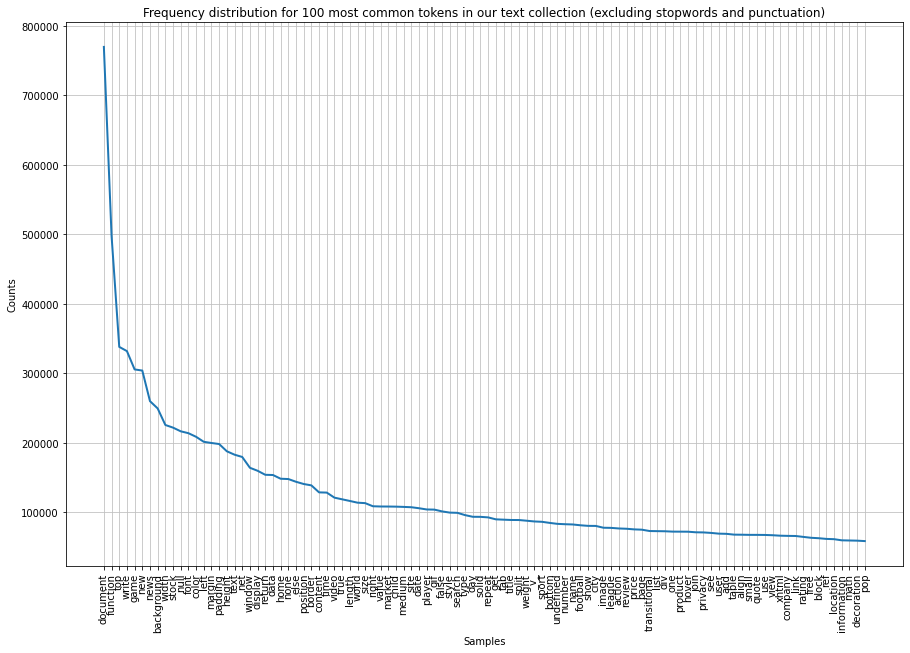

<AxesSubplot:title={'center':'Frequency distribution for 100 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [60]:
fdist = FreqDist(nltk.Text(data))
plt.figure(figsize=(15, 10))
fdist.plot(100,title='Frequency distribution for 100 most common tokens in our text collection (excluding stopwords and punctuation)')

In [61]:
del data

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [32]:
import lsh
import itertools

def shingles(document, shingle=5):
    return set(document[i:i + shingle] for i in range(0, len(document) - shingle))

def jaccard(shingles_0, shingles_1):
    return len(set(shingles_0) & set(shingles_1)) / len(set(shingles_0) | set(shingles_1))

def candidate_duplicates(document_feed, char_ngram=5, seeds=100, bands=5, hashbytes=4):
    hasher = minhash.MinHasher(seeds=seeds, char_ngram=char_ngram, hashbytes=hashbytes)
    if seeds % bands != 0:
        raise ValueError('Seeds has to be a multiple of bands. {} % {} != 0'.format(seeds, bands))

    lshcache = cache.Cache(num_bands=bands, hasher=hasher)
    for docid, line in enumerate(document_feed):
        fingerprint = hasher.fingerprint(line)

        # in addition to storing the fingerpring store the line
        # number and document ID to help analysis later on
        lshcache.add_fingerprint(fingerprint, doc_id=docid)

    candidate_pairs = set()
    for b in lshcache.bins:
        for bucket_id in b:
            if len(b[bucket_id]) > 1:
                pairs_ = set(itertools.combinations(b[bucket_id], r=2))
                candidate_pairs.update(pairs_)

    return candidate_pairs

In [25]:
from lsh import minhash, cache
data = []
for sent in corpus:
    sent = ' '.join(sent)
    data.append(sent)

In [26]:
hasher = minhash.MinHasher(seeds=100, char_ngram=5, hashbytes=4)
lshcache = cache.Cache(bands=10, hasher=hasher)

# read in the data file and add the first 100 documents to the LSH cache

for docid, line in enumerate(data):
    # docid, articletext = line.decode('utf8').split('\t', 1)
    lshcache.add_fingerprint(hasher.fingerprint(line), docid)

# for every bucket in the LSH cache get the candidate duplicates
candidate_pairs = set()
for b in lshcache.bins:
    for bucket_id in b:
        if len(b[bucket_id]) > 1: # if the bucket contains more than a single document
            pairs_ = set(itertools.combinations(b[bucket_id], r=2))
            candidate_pairs.update(pairs_)

In [27]:
candidate_pairs

{(18514, 65399),
 (16437, 15060),
 (69720, 69779),
 (59084, 11759),
 (27399, 27757),
 (16793, 40422),
 (58416, 58589),
 (37950, 64317),
 (38217, 63223),
 (10342, 57091),
 (59143, 11602),
 (44813, 46183),
 (6891, 6612),
 (25028, 1366),
 (39019, 63982),
 (62294, 14877),
 (20954, 46055),
 (38409, 38462),
 (14601, 15378),
 (50379, 50197),
 (49875, 2452),
 (16394, 38518),
 (8831, 8375),
 (58984, 11578),
 (43953, 19738),
 (48500, 1018),
 (21399, 46163),
 (6193, 53445),
 (61940, 62809),
 (9723, 10235),
 (62919, 15951),
 (63926, 14424),
 (14192, 15743),
 (35011, 11639),
 (39701, 16079),
 (30836, 54740),
 (62014, 64162),
 (62725, 14317),
 (63762, 62341),
 (39480, 15355),
 (63988, 15870),
 (62102, 38127),
 (55755, 7482),
 (44713, 22204),
 (21240, 46329),
 (62504, 15037),
 (53621, 53712),
 (46261, 22032),
 (63824, 64411),
 (63646, 63673),
 (44658, 69569),
 (15172, 40352),
 (66253, 17995),
 (34661, 11647),
 (44777, 21614),
 (29874, 29580),
 (41630, 42563),
 (16549, 14246),
 (62255, 37973),
 (67828

In [28]:
pair = next(iter(candidate_pairs))
print(pair)
pair = list(pair)
print(data[pair[0]], data[pair[1]])

(18514, 65399)
['public', 'wc', 'transitional', 'en', 'w', 'html', 'loose', 'head', 'title', 'eye', 'judgment', 'rotten', 'directdrive', 'undefined', 'new', 'date', 'random', 'ref', 'document', 'referrer', 'r', 'escape', 'document', 'referrer', 'ref', 'ref', 'split', 'join', 'f', 'ref', 'ref', 'split', 'join', 'e', 'ref', 'ref', 'split', 'join', 'document', 'write', 'function', 'mail_console', 'window', 'open', 'bin', 'gaming', 'p', 'eye', 'judgment', 'mail_console', 'width', 'height', 'status', 'document', 'domain', 'function', 'open_popup', 'width', 'height', 'left', 'screen', 'width', 'width', 'top', 'screen', 'height', 'height', 'new_window', 'window', 'open', 'location', 'status', 'yes', 'width', 'width', 'height', 'height', 'new_window', 'top', 'left', 'show', 'flash', 'width', 'height', 'test', 'top', 'add', 'make', 'home', 'page', 'advertising', 'content', 'medium', 'show', 'masthead', 'document', 'write', 'search', 'web', 'home', 'eye', 'judgment', 'eye', 'judgment', 'descript

In [40]:
num_candidates_shingles = []
shingles = [5, 7, 9, 10]
for shingle in shingles:
    candidates = candidate_duplicates(data, char_ngram=shingle)
    num_candidates_shingles.append(len(candidates))

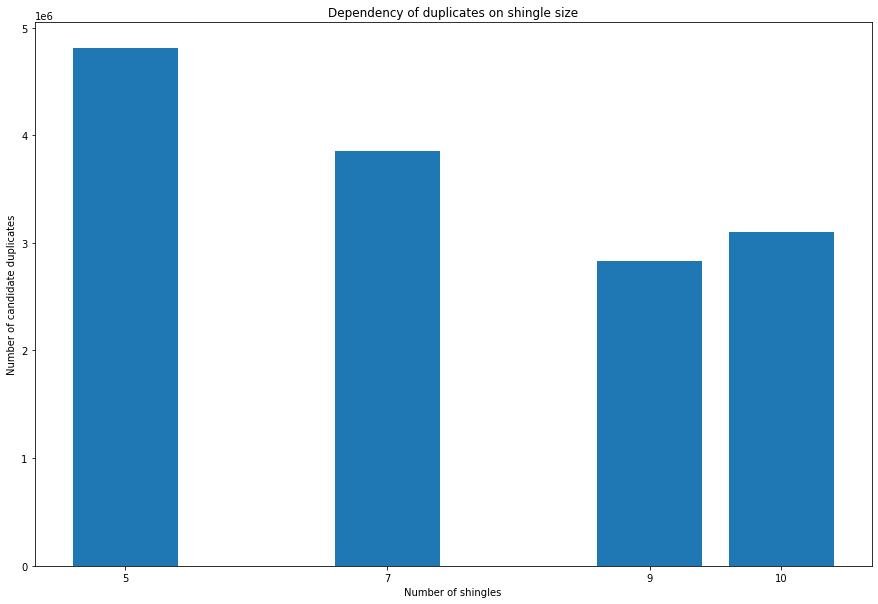

In [41]:
plt.figure(figsize=(15, 10))
plt.bar(shingles, num_candidates_shingles, align='center')
plt.title('Dependency of duplicates on shingle size')
plt.xlabel('Number of shingles')
plt.ylabel('Number of candidate duplicates')
plt.xticks(shingles, shingles)
plt.show()

In [42]:
num_candidates = []
lengths = [50, 100, 150,200, 250]
for l in lengths:
    candidates = candidate_duplicates(data, seeds=l)
    num_candidates.append(len(candidates))

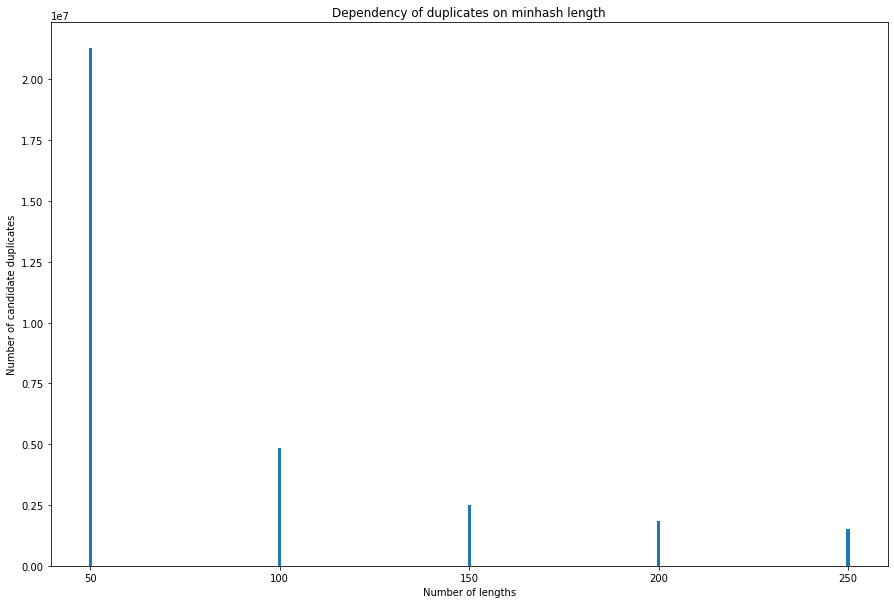

In [44]:
plt.figure(figsize=(15, 10))
plt.bar(lengths, num_candidates, align='center')
plt.title('Dependency of duplicates on minhash length')
plt.xlabel('Number of lengths')
plt.ylabel('Number of candidate duplicates')
plt.xticks(lengths, lengths)
plt.show()

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.